In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder ,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,BatchNormalization,Dense,Activation

In [2]:
df=pd.read_csv("churn_modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("Total number of Observations present in the dataset is:",df.shape[0])
print("Total number of Features present in the dataset is:",df.shape[1])

Total number of Observations present in the dataset is: 10000
Total number of Features present in the dataset is: 14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().style.background_gradient(cmap='Oranges')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,15690940.569400,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,2886.895680,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum().to_frame().rename(columns={0:'Total Num of Missing Values'})

,Total Num of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [8]:
df.duplicated().any()

False

In [9]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [10]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4418,4419,15644356,Prokhorova,682,Spain,Female,47,10,134032.01,1,1,0,144290.97,0
5690,5691,15676707,Sidorov,577,Spain,Female,39,4,0.00,2,1,0,91366.42,0
8783,8784,15617052,Watson,782,France,Male,34,9,0.00,1,1,0,183021.06,1
4824,4825,15799357,Armfield,727,France,Male,35,5,136364.46,1,0,0,142754.71,0
3834,3835,15704819,Ositadimma,734,Spain,Female,39,6,92126.26,2,0,0,112973.34,0


In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'] , inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
###EDA

In [14]:
df.rename(columns={'Exited':'Churned'},inplace=True)

In [15]:
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


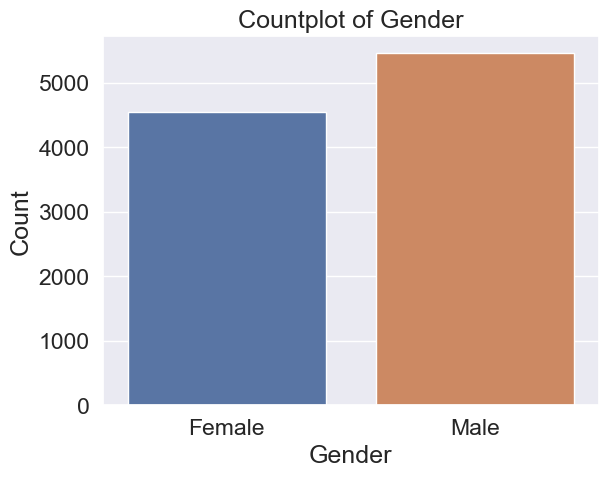

In [17]:

sns.countplot(data=df, x='Gender')


plt.title('Countplot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()


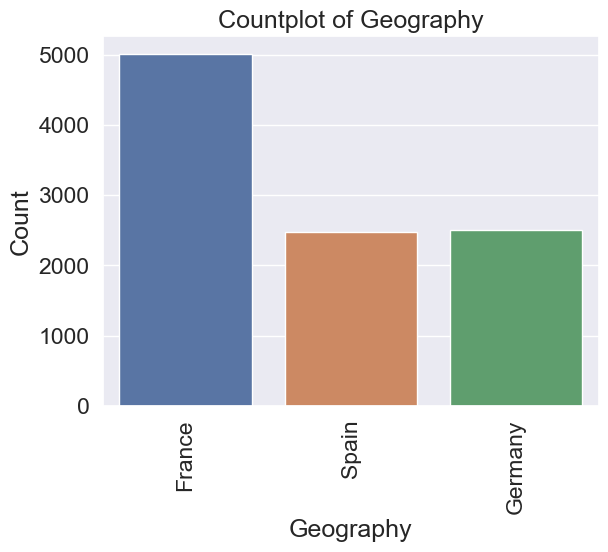

In [18]:



sns.countplot(data=df, x='Geography')


plt.xticks(rotation=90)

plt.title('Countplot of Geography')
plt.xlabel('Geography')
plt.ylabel('Count')

# Show the plot
plt.show()


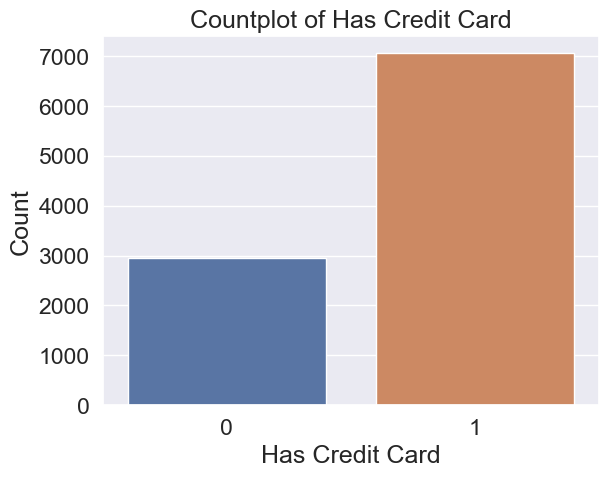

In [19]:
sns.countplot(data=df, x='HasCrCard')

# Add title and labels
plt.title('Countplot of Has Credit Card')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')

# Show the plot
plt.show()

<Axes: xlabel='HasCrCard', ylabel='count'>

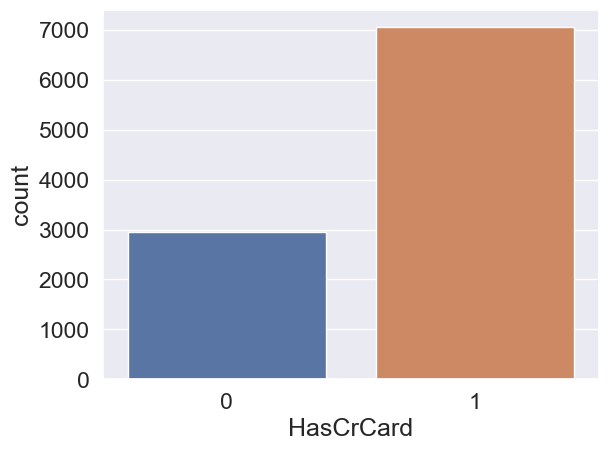

In [20]:
sns.countplot(data=df, x='HasCrCard')

<Axes: xlabel='IsActiveMember', ylabel='count'>

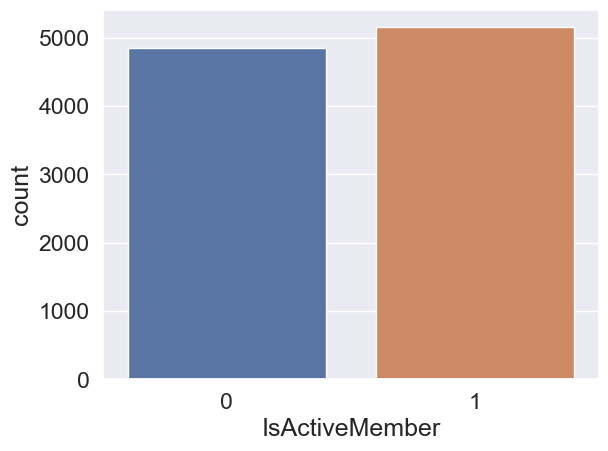

In [21]:
sns.countplot(data=df,x='IsActiveMember')

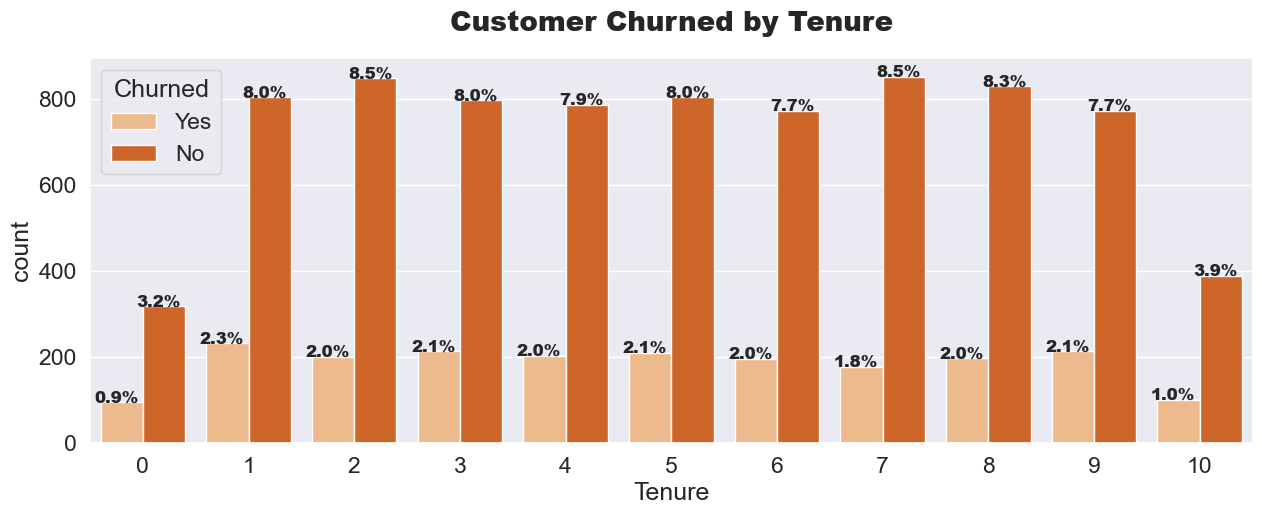

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Oranges")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

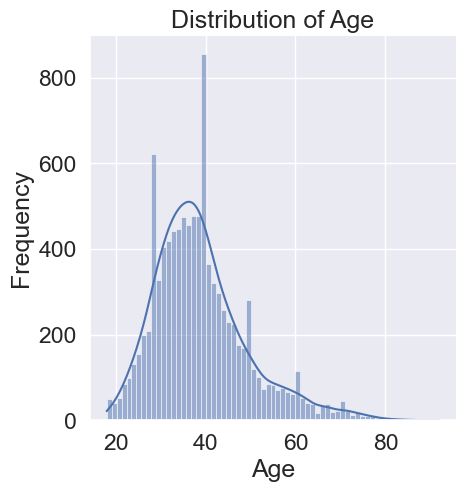

In [23]:

sns.displot(data=df, x='Age', kde=True)  
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


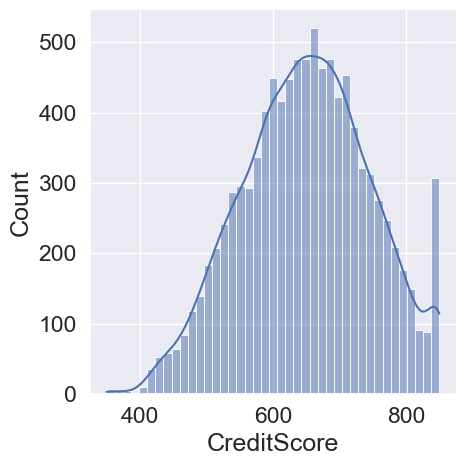

In [24]:
sns.displot(data=df,x="CreditScore",kde=True)

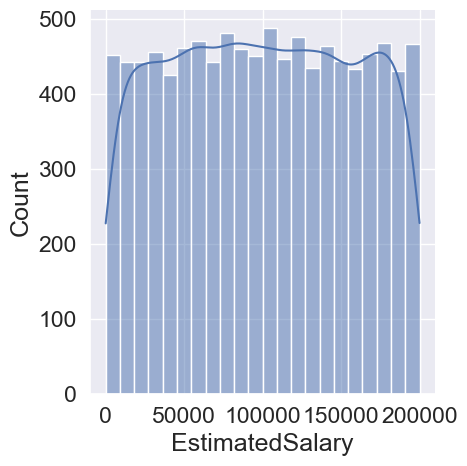

In [25]:
sns.displot(data=df,x="EstimatedSalary",kde=True)

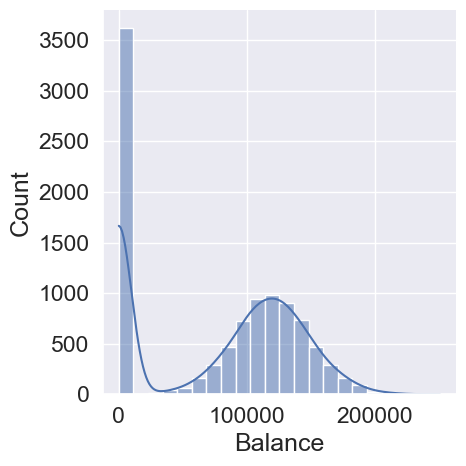

In [26]:
sns.displot(data=df,x="Balance",kde=True)

In [27]:
#preprocessing


In [28]:
#encoding

In [29]:
encoder = OneHotEncoder()

In [30]:
columns_to_encode = ['Geography', 'Gender']

In [31]:
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[columns_to_encode])

In [32]:
encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

In [33]:
df.drop(columns_to_encode, axis=1, inplace=True)
df[encoded_column_names] = encoded_columns

In [34]:
le = LabelEncoder()

In [35]:
df["Churned"] = le.fit_transform(df["Churned"])

In [36]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [37]:
cols = ["CreditScore","Age","EstimatedSalary","Balance"]

In [38]:
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085
Balance,-0.141109


In [39]:
old_age = df["Age"]

In [40]:
df["Age"] = np.log(df["Age"])

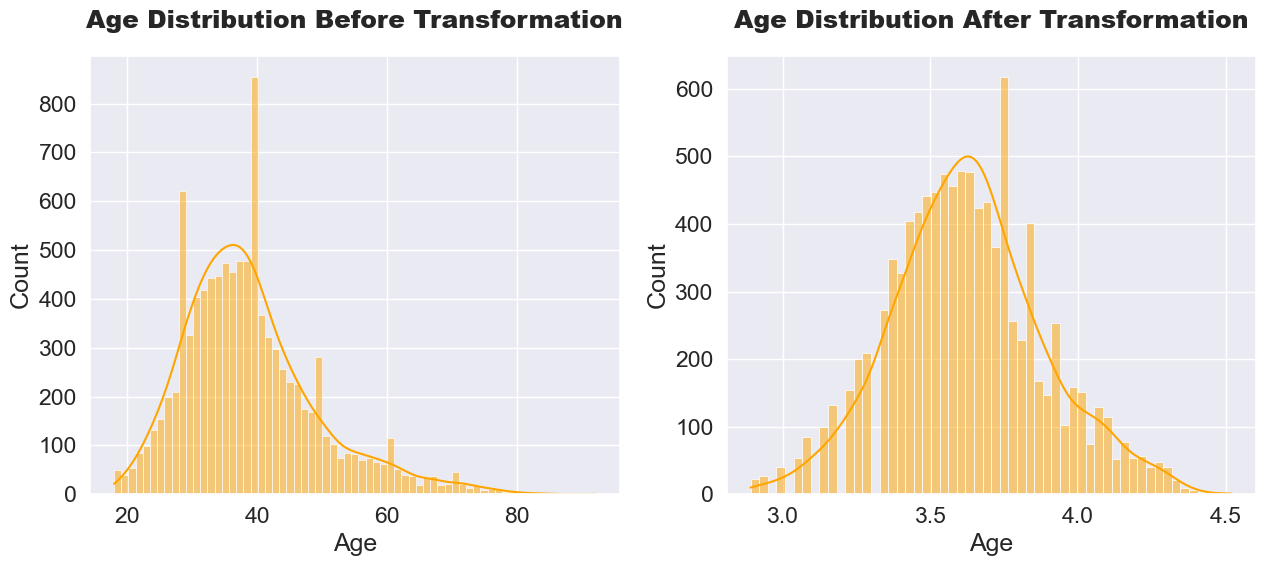

In [41]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="orange", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="orange", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

In [42]:
sc1=StandardScaler()
sc2=StandardScaler()
sc3=StandardScaler()
sc4=StandardScaler()

In [43]:
df["CreditScore"] = sc1.fit_transform(df[["CreditScore"]])
df["Age"] = sc2.fit_transform(df[["Age"]])
df["Balance"] = sc3.fit_transform(df[["Balance"]])
df["EstimatedSalary"] = sc4.fit_transform(df[["EstimatedSalary"]])

In [44]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.425883,2,-1.225848,1,1,1,0.021886,1,1.0,0.0,0.0,1.0,0.0
1,-0.440036,0.332621,1,0.117350,1,0,1,0.216534,0,0.0,0.0,1.0,1.0,0.0
2,-1.536794,0.425883,8,1.333053,3,1,0,0.240687,1,1.0,0.0,0.0,1.0,0.0
3,0.501521,0.139072,1,-1.225848,2,0,0,-0.108918,0,1.0,0.0,0.0,1.0,0.0
4,2.063884,0.516950,2,0.785728,1,1,1,-0.365276,0,0.0,0.0,1.0,1.0,0.0


In [45]:
X = df.drop(columns=["Churned"] , axis=1 )
y = df["Churned"]

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

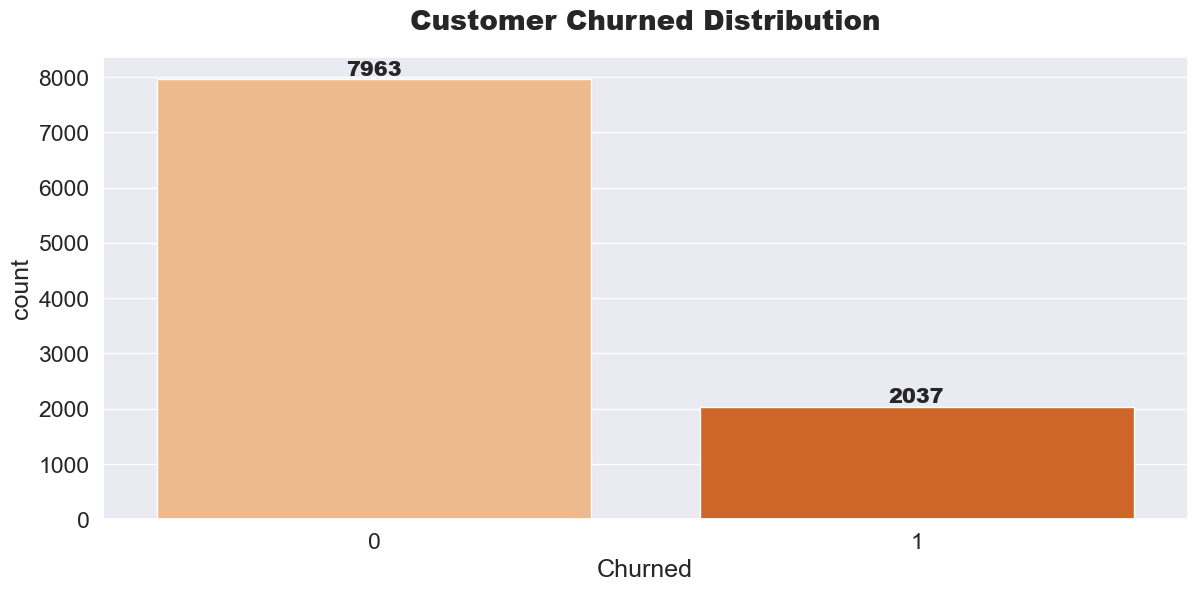

In [47]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='Churned', palette='Oranges')
ax.bar_label(ax.containers[0], fontweight='black', size=15)
plt.title('Customer Churned Distribution', fontweight='black', size=20, pad=20)

plt.show()

In [48]:
under_sampler = RandomUnderSampler(random_state=42)

In [49]:
x_train_under, y_train_under = under_sampler.fit_resample(x_train, y_train)

In [50]:
print("Class distribution after under-sampling:")
print(Counter(y_train_under))


Class distribution after under-sampling:
Counter({0: 1644, 1: 1644})


//Building ANN MOdel


In [52]:
model=Sequential()

In [58]:
# Input layer
model.add(Dense(units=30, activation='relu', kernel_initializer='he_normal'))  # Specify input shape

# Hidden Layers
model.add(Dense(units=300, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units=100, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units=50, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Output layer
model.add(Dense(units=1, activation='sigmoid'))




In [59]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


In [60]:
model.fit(x=x_train,y=y_train,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6329 - loss: 0.6958 - val_accuracy: 0.8125 - val_loss: 0.4229
Epoch 2/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7732 - loss: 0.4964 - val_accuracy: 0.8135 - val_loss: 0.4128
Epoch 3/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7893 - loss: 0.4857 - val_accuracy: 0.8190 - val_loss: 0.3999
Epoch 4/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7991 - loss: 0.4498 - val_accuracy: 0.8205 - val_loss: 0.3929
Epoch 5/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8044 - loss: 0.4358 - val_accuracy: 0.8220 - val_loss: 0.3873
Epoch 6/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8094 - loss: 0.4306 - val_accuracy: 0.8440 - val_loss: 0.3755
Epoch 7/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8202 - loss: 0.4147 - val_accuracy: 0.8450 - val_loss: 0.3660
Epoch 8/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8287 - loss: 0.4051 - val_accu

In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (32, 30)                    │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (32, 300)                   │           9,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (32, 300)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (32, 300)                   │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (32, 100)                   │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (32, 100)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (32, 100)                   │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (32, 50)                    │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (32, 50)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (32, 50)                    │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (32, 1)                     │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138,365 (540.49 KB)

 Trainable params: 45,821 (178.99 KB)

 Non-trainable params: 900 (3.52 KB)

 Optimizer params: 91,644 (357.99 KB)

In [62]:
model_loss=pd.DataFrame(model.history.history)

In [63]:
model_loss.head()

,accuracy,loss,val_accuracy,val_loss
0,0.696750,0.607189,0.8125,0.422934
1,0.780125,0.487060,0.8135,0.412849
2,0.792875,0.467302,0.8190,0.399866
3,0.801000,0.445560,0.8205,0.392917
4,0.805000,0.437003,0.8220,0.387286


<Axes: >

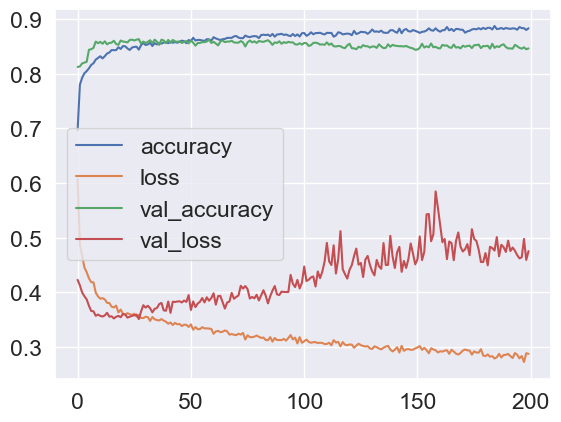

In [64]:
model_loss.plot()

<Axes: >

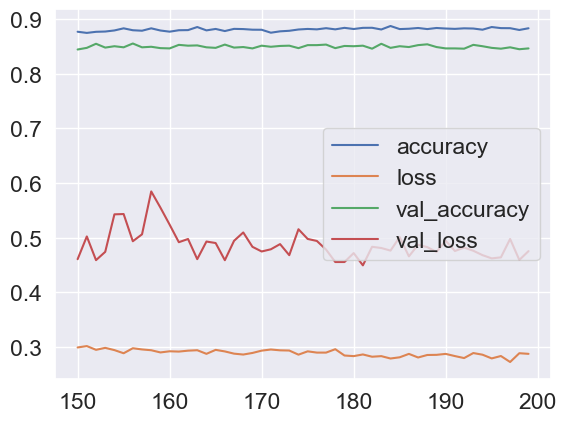

In [65]:
model_loss.tail(50).plot()

In [66]:
predictions=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [67]:
ypred= (model.predict(x_test) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [79]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1607
           1       0.66      0.45      0.53       393

    accuracy                           0.85      2000
   macro avg       0.77      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000

